# Step 1: Business Understanding

## Objective

Syriatel is a telecommunications company experiencing a growing concern over customer churn, which refers to the loss of clients or subscribers. The goal of this project is to build a machine learning model that accurately predicts whether a customer is likely to churn based on their behavior and service usage history.

By identifying high-risk customers early, Syriatel can implement proactive retention strategies, such as targeted offers, discounts, or personalized support.

## Problem Statement

Customer churn has a direct impact on company revenue and growth. Acquiring a new customer is often more expensive than retaining an existing one. Syriatel seeks to leverage historical customer data to develop a predictive model that classifies customers into two categories:

- **Churn = True**: Customers who are likely to leave the service.
- **Churn = False**: Customers who are expected to stay.

## Goals

- Understand the factors that contribute to customer churn.
- Build a reliable classification model using historical customer data.
- Provide actionable insights and recommendations to reduce churn rates.
- Deploy the model in a way that integrates with Syriatel’s customer relationship management (CRM) systems for real-time retention action.

## Success Criteria

- A trained model with acceptable classification performance (e.g., accuracy, precision, recall).
- A clean, reproducible notebook that explains each step clearly.
- Data preprocessed using pipelines to prevent leakage and ensure future scalability.
- A summary of the top churn indicators to assist business teams in retention strategy.


# Step 2: Data Understanding

Understanding the structure, quality, and content of the data is essential before building any predictive model. This step involves reviewing the dataset's shape, data types, missing values, and summary statistics. The insights gathered here will inform decisions during data preparation and feature engineering.

### Dataset Overview

The dataset contains historical records of Syriatel customers, including usage patterns, service subscriptions, and whether or not the customer has churned (target variable: `Churn`).

### Key Tasks:
- Load the dataset and examine its structure.
- Check for missing values and inconsistent data types.
- Identify categorical vs numerical features.
- Analyze class balance for the target variable (`Churn`).


### 1. Load the dataset and inspect structure


In [2]:
import pandas as pd

# Load dataset
file_path = "../data/bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(file_path)

# Show shape and column names
print("Dataset shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())


Dataset shape: (3333, 21)

Columns:
['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


 ### 2. Inspect data types and missing values

In [3]:
# Show info and check for null values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 3. Class distribution of target variable

In [4]:
# Target variable distribution
print("churn class distribution:")
print(df['churn'].value_counts(normalize=True))


churn class distribution:
False    0.855086
True     0.144914
Name: churn, dtype: float64


### 4. Show first few records

In [5]:
# Preview first 5 records
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 5. Describe numeric features

In [6]:
# Summary statistics for numerical columns
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 6. Check for duplicate rows



In [7]:
# Check for duplicates
print("Duplicate records:", df.duplicated().sum())


Duplicate records: 0


# Findings

## Dataset Structure

The dataset consists of 3,333 customer records and 21 columns. Each row represents a single customer, and the columns contain attributes such as usage metrics, service plan subscriptions, and the target variable `churn`.

- **Rows (observations):** 3,333  
- **Columns (features):** 21  
- **Target variable:** `churn` (Boolean, where `True` indicates the customer churned)

## Data Quality

- No missing values are present in any column.
- All data types are appropriate and consistent (e.g., numerical features are floats or integers, categorical features are strings).
- There are no duplicate rows in the dataset.

## Class Distribution

- The target variable `churn` is imbalanced:
  - `False` (no churn): 85.5% of customers
  - `True` (churn): 14.5% of customers

This imbalance suggests that accuracy alone is not a suitable performance metric. Evaluation will require additional focus on precision, recall, or F1-score.

## Feature Types

- **Categorical features:** `state`, `area code`, `phone number`, `international plan`, `voice mail plan`
- **Numerical features:** Remaining columns such as `account length`, `total day minutes`, `total eve calls`, `customer service calls`, etc.

Note: `phone number` is a unique identifier and does not contribute meaningfully to prediction; it should be dropped during data preparation.

## Statistical Summary

- Features such as `total day minutes`, `total eve minutes`, and `total night minutes` have a wide range of values and may require scaling.
- Many customers have `0` voice mail messages, suggesting that the `voice mail plan` is not widely used.
- The `customer service calls` feature ranges from 0 to 9, which may capture customer dissatisfaction and could be an important predictor of churn.

## Preliminary Insights

- The dataset is clean, well-structured, and ready for detailed data preparation.
- Some columns (e.g., `phone number`) may need to be excluded.
- The imbalance in the target variable will need to be addressed during model training through appropriate techniques such as stratified splitting or class weighting.



# Step 3 : Data Preparation
This step focuses on preparing the features and target variable for machine learning, while strictly avoiding data leakage.

### 3.1: Drop irrelevant columns

In [8]:
# Drop the phone number column as it has no predictive value
df.drop(columns=['phone number'], inplace=True)


### 3.2: Encode target variable

In [9]:
# Convert churn from boolean to binary integer
df['churn'] = df['churn'].astype(int)


### Step 3.3: Identify feature types

In [14]:
# Define categorical and numerical features
categorical_features = ['state','area_code', 'international_plan', 'voice_mail_plan']
numerical_features = df.drop(columns=categorical_features + ['churn']).columns.tolist()
print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)


Categorical features: ['state', 'area_code', 'international_plan', 'voice_mail_plan']
Numerical features: ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']


### 3.4 Rename Columns 

We standardize column names by replacing spaces with underscores.


In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns


Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

### 3.5 Backup Final Cleaned DataFrame


In [15]:
clean_df = df.copy()


In [16]:
print(clean_df.shape)
print(clean_df.columns)


(3333, 20)
Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


# STEP 4: EXPLORATORY DATA ANALYSIS
Exploratory Data Analysis (EDA) is a critical step that helps us understand the structure, quality, and relationships within the data. By visualizing and summarizing the features, we can identify key patterns, trends, anomalies, and potential signals that may influence customer churn.

This section includes:

- Analyzing the distribution of the target variable churn

- Understanding the spread and behavior of numerical and categorical features

- Investigating how features relate to churn

- Identifying correlations and multicollinearity

- Highlighting insights to inform feature selection and model development

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

### 4.1 Target Variable Distribution

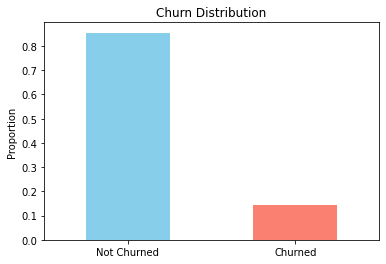

In [ ]:
# Target variable distribution
churn_counts = df['churn'].value_counts(normalize=True)
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)
plt.ylabel('Proportion')
plt.show()


The bar chart above displays the distribution of churned vs. non-churned customers in the dataset.

- The blue bar represents non-churned customers (0).
- The red bar represents churned customers (1).

 **Observations**
- The dataset is highly imbalanced, with significantly more non-churned customers.

- This imbalance could affect model performance, especially in metrics like accuracy.


### 4.2 Numerical Feature Distributions

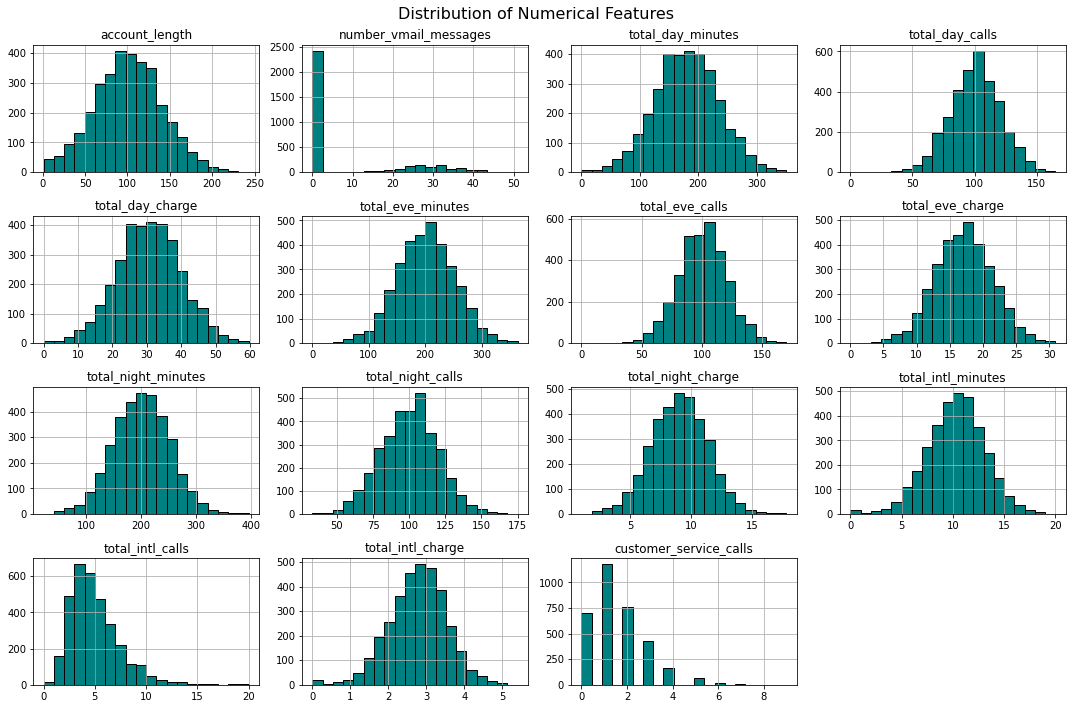

In [ ]:
# Histograms for numerical features
df[numerical_features].hist(figsize=(15, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


### 4.3 Categorical Feature Distributions

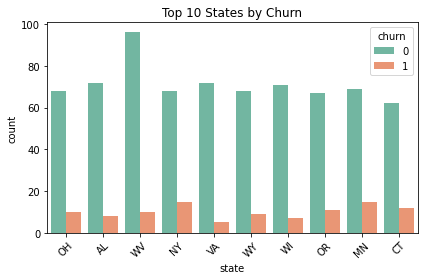

In [ ]:
top_states = clean_df['state'].value_counts().nlargest(10).index
sns.countplot(data=clean_df[clean_df['state'].isin(top_states)], x='state', hue='churn', palette='Set2')
plt.title('Top 10 States by Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


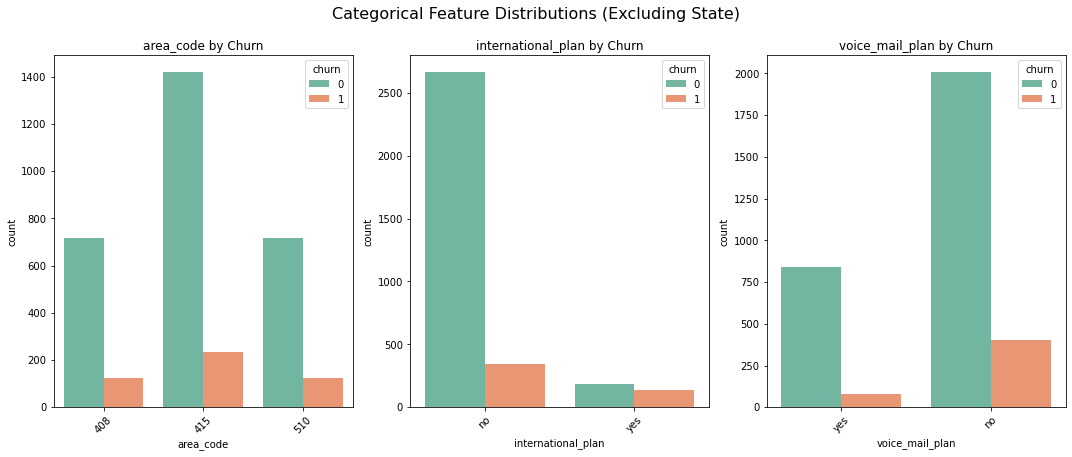

In [ ]:
# List of categorical features
categorical_features = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

# Remove 'state'
cat_features_to_plot = [col for col in categorical_features if col != 'state']

# Plot each in a separate subplot
plt.figure(figsize=(15, 6))
for i, col in enumerate(cat_features_to_plot):
    plt.subplot(1, len(cat_features_to_plot), i + 1)
    sns.countplot(data=clean_df, x=col, hue='churn', palette='Set2')
    plt.title(f'{col} by Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Categorical Feature Distributions (Excluding State)', fontsize=16, y=1.05)
plt.show()



### 4.4 Churn Rate by Categorical Features

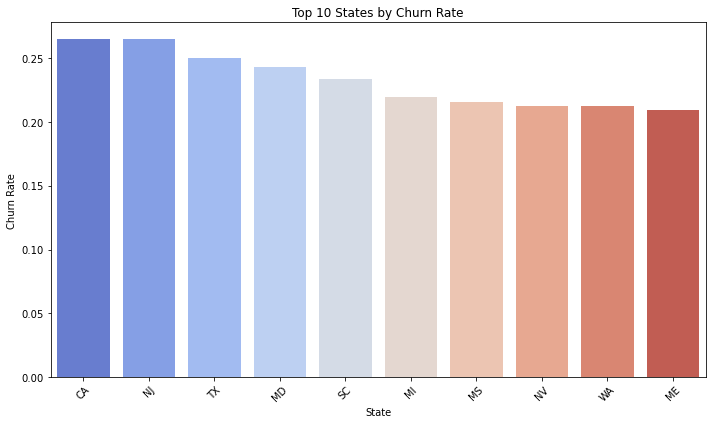

In [ ]:
# Calculate churn rate by state
state_churn_rate = clean_df.groupby('state')['churn'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=state_churn_rate.index, y=state_churn_rate.values, palette='coolwarm')
plt.title('Top 10 States by Churn Rate')
plt.ylabel('Churn Rate')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


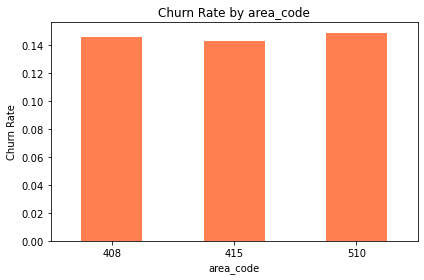

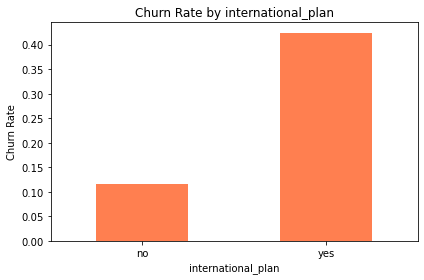

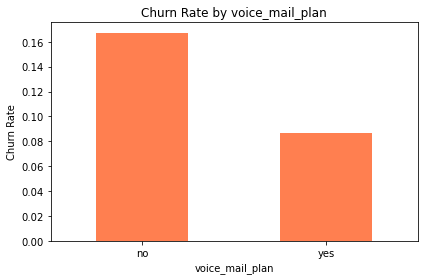

In [ ]:
# Bar plots of churn rate by categorical variables
# Exclude 'state' from categorical features
plot_features = [col for col in categorical_features if col != 'state']

# Plot churn rate for each categorical feature (excluding 'state')
for col in plot_features:
    churn_rate = clean_df.groupby(col)['churn'].mean()
    churn_rate.plot(kind='bar', color='coral')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()



### 4.5 Correlation Matrix for Numerical Features

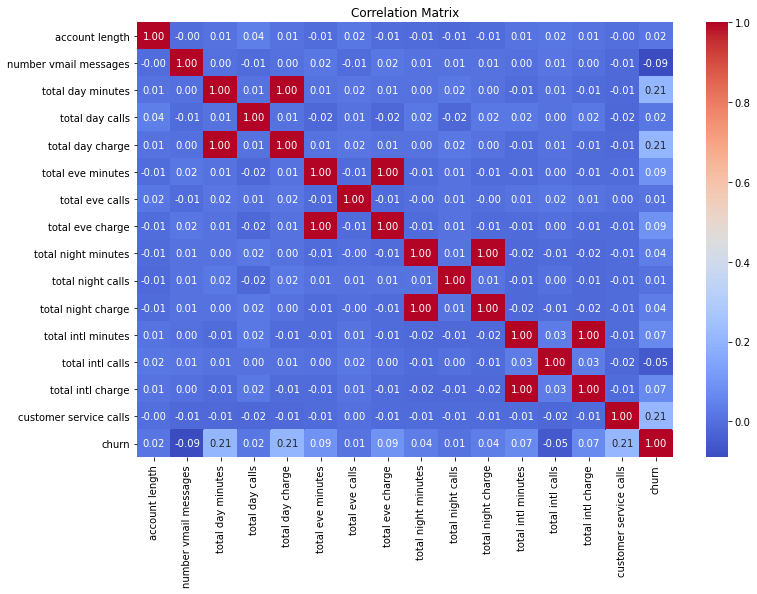

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features + ['churn']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Step 4.6: Box Plots for Numerical Features by Churn

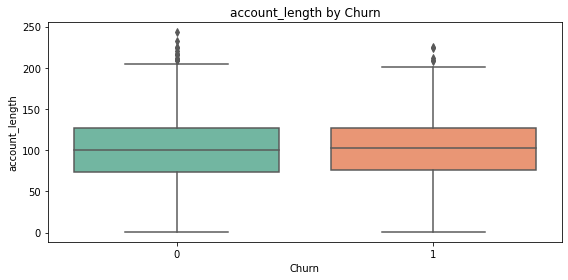

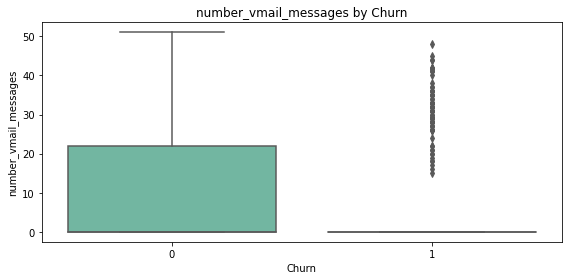

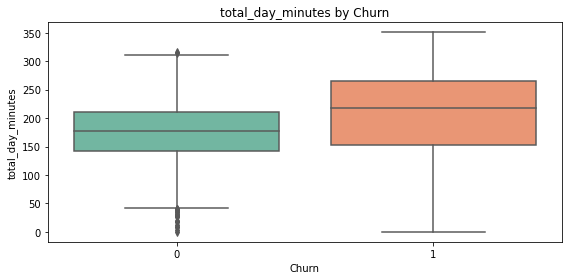

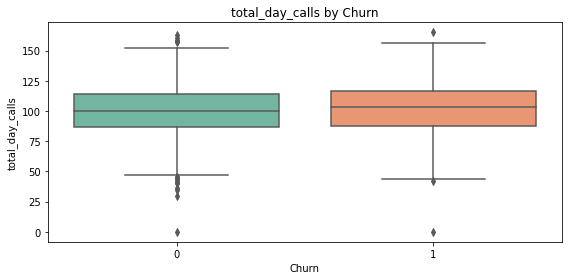

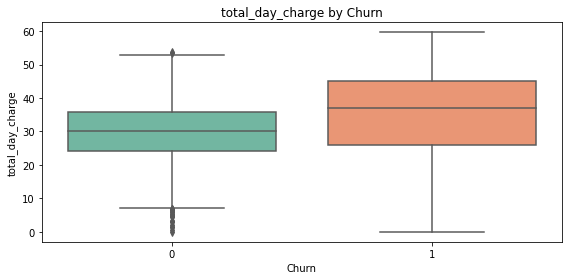

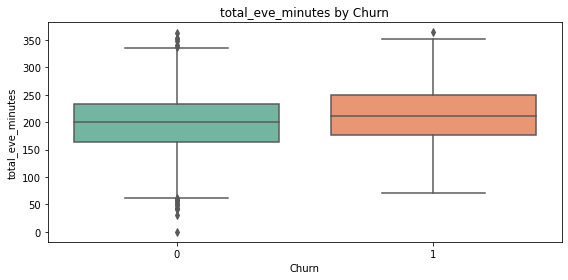

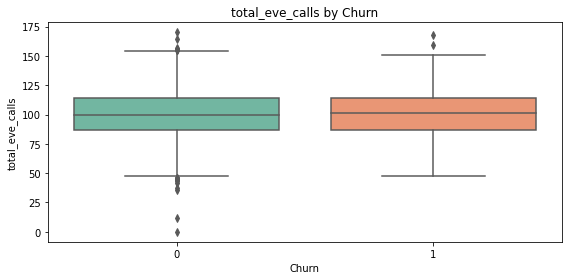

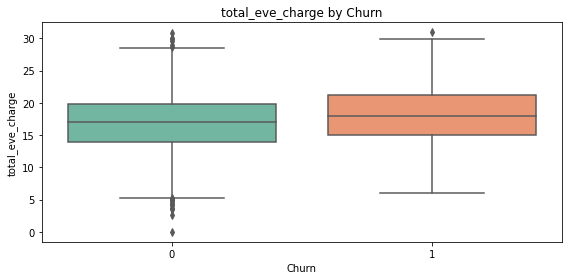

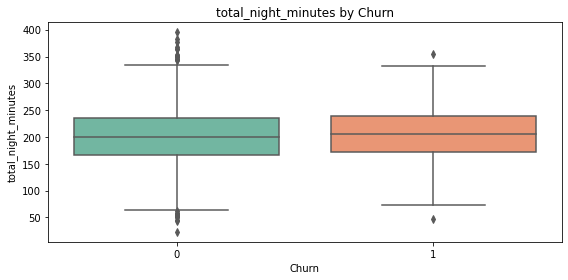

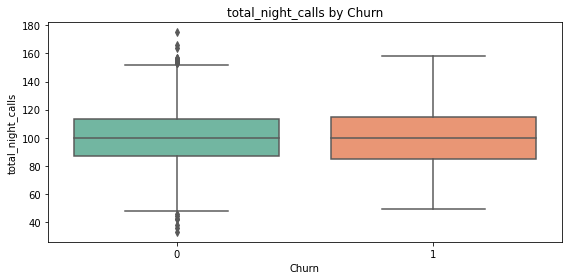

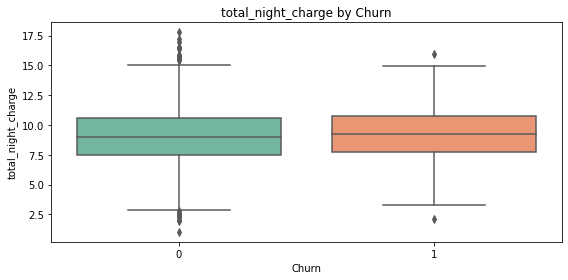

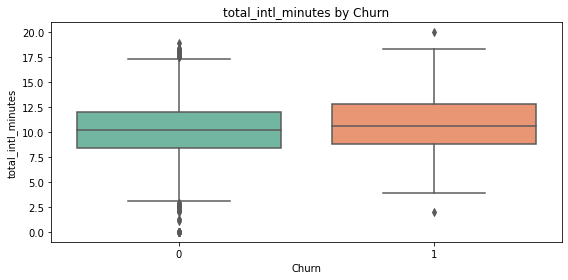

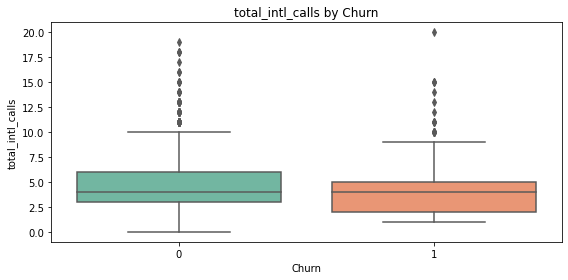

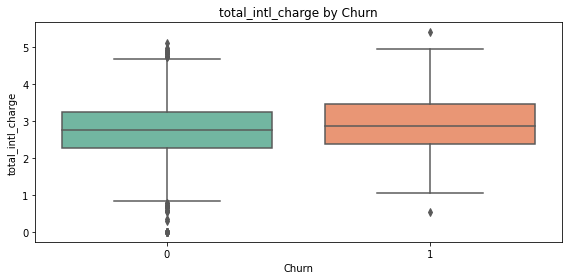

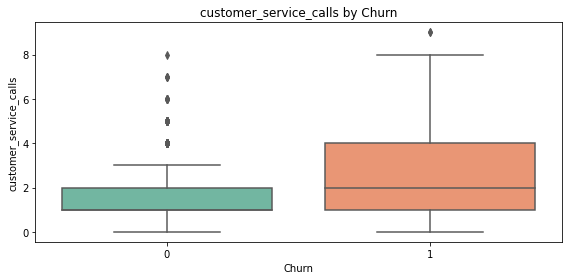

In [ ]:
# Box plots for numerical features grouped by churn
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='churn', y=col, data=clean_df, palette='Set2')
    plt.title(f'{col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [ ]:
# Select sample again to avoid crowding
sample_df = clean_df.sample(200)

# Ensure churn is included
sns.pairplot(sample_df[numerical_features + ['churn']], hue='churn', diag_kind='kde', palette='husl')
plt.suptitle('Pairwise Feature Relationships (Sampled)', fontsize=16)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

# Step 5: Statistical Analysis
Objective:
To analyze feature distributions, detect potential data issues (e.g. outliers, skewness), and examine how features differ across churned vs. non-churned customers. This helps identify statistically significant variables for model building.

### 5.1 Descriptive Statistics Overview
This gives a transposed summary of numerical features.

Helps identify features with high variability, skewness, or outliers.

In [17]:
# 5.1 Descriptive statistics
# Basic descriptive statistics
clean_df[numerical_features].describe().T



,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
total_night_calls,3333.0,100.107711,19.568609,33.00,87.00,100.00,113.00,175.00


### 5.2 Compare Feature Means by Churn Status

In [19]:
# Overall churn rate
overall_churn_rate = clean_df['churn'].mean()
print(f"Overall churn rate: {overall_churn_rate:.2%}")

# Churn rate by key categorical features
for feature in ['international_plan', 'voice_mail_plan', 'area_code']:
    rate = clean_df.groupby(feature)['churn'].mean()
    print(f"\nChurn rate by {feature}:\n{rate}")



Overall churn rate: 14.49%

Churn rate by international_plan:
international_plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64

Churn rate by voice_mail_plan:
voice_mail_plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64

Churn rate by area_code:
area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


### 5.3 Correlation Matrix
Reveals linear relationships and potential multicollinearity.

Useful for feature selection and reducing redundancy.


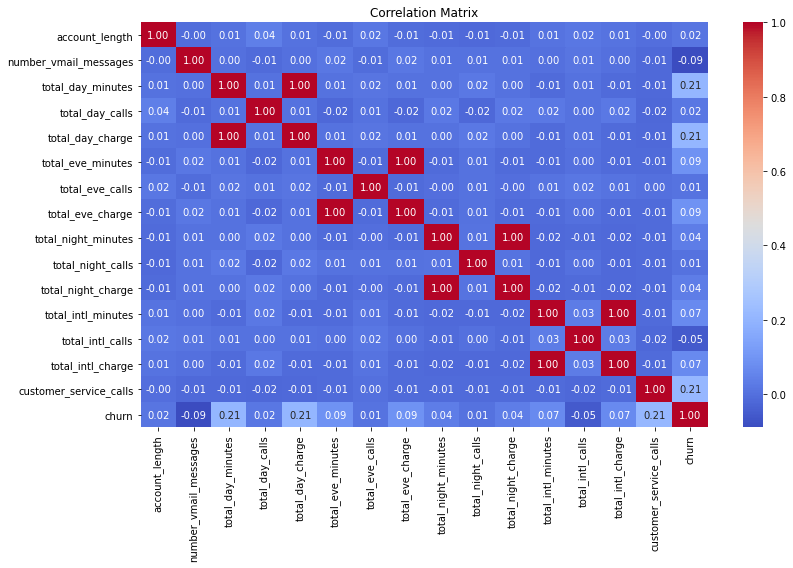

In [22]:

# Correlation matrix
correlation_matrix = clean_df[numerical_features + ['churn']].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


 ### 5.4 Skewness and Kurtosis

In [25]:
# 5.4 Skewness and Kurtosis

for feature in numerical_features:
    skew = clean_df[feature].skew()
    kurt = clean_df[feature].kurtosis()
    print(f"{feature}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")


account_length: Skewness = 0.10, Kurtosis = -0.11
number_vmail_messages: Skewness = 1.26, Kurtosis = -0.05
total_day_minutes: Skewness = -0.03, Kurtosis = -0.02
total_day_calls: Skewness = -0.11, Kurtosis = 0.24
total_day_charge: Skewness = -0.03, Kurtosis = -0.02
total_eve_minutes: Skewness = -0.02, Kurtosis = 0.03
total_eve_calls: Skewness = -0.06, Kurtosis = 0.21
total_eve_charge: Skewness = -0.02, Kurtosis = 0.03
total_night_minutes: Skewness = 0.01, Kurtosis = 0.09
total_night_calls: Skewness = 0.03, Kurtosis = -0.07
total_night_charge: Skewness = 0.01, Kurtosis = 0.09
total_intl_minutes: Skewness = -0.25, Kurtosis = 0.61
total_intl_calls: Skewness = 1.32, Kurtosis = 3.08
total_intl_charge: Skewness = -0.25, Kurtosis = 0.61
customer_service_calls: Skewness = 1.09, Kurtosis = 1.73


### 5.5 Hypothesis Testing: t-tests between churn groups

In [27]:
from scipy.stats import ttest_ind

# T-test between churned and non-churned for each numerical feature
for feature in numerical_features:
    t_stat, p_val = ttest_ind(churned[feature], not_churned[feature], equal_var=False)
    print(f"T-test for {feature}: t = {t_stat:.2f}, p = {p_val:.4f}")


T-test for account_length: t = 0.96, p = 0.3365
T-test for number_vmail_messages: t = -5.82, p = 0.0000
T-test for total_day_minutes: t = 9.68, p = 0.0000
T-test for total_day_calls: t = 1.00, p = 0.3165
T-test for total_day_charge: t = 9.68, p = 0.0000
T-test for total_eve_minutes: t = 5.27, p = 0.0000
T-test for total_eve_calls: t = 0.54, p = 0.5912
T-test for total_eve_charge: t = 5.27, p = 0.0000
T-test for total_night_minutes: t = 2.17, p = 0.0303
T-test for total_night_calls: t = 0.35, p = 0.7273
T-test for total_night_charge: t = 2.17, p = 0.0303
T-test for total_intl_minutes: t = 3.94, p = 0.0001
T-test for total_intl_calls: t = -2.96, p = 0.0032
T-test for total_intl_charge: t = 3.94, p = 0.0001
T-test for customer_service_calls: t = 8.96, p = 0.0000


 ### 5.6 ANOVA Test (Numerical vs. Target)
Test whether the mean of numerical features differs significantly across churn groups.
ANOVA (Analysis of Variance) tests whether group means are significantly different.

p-value < 0.05 means that the feature differs significantly across churn groups.

In [24]:
from scipy.stats import f_oneway

# Separate churn groups
churned = clean_df[clean_df['churn'] == 1]
not_churned = clean_df[clean_df['churn'] == 0]

# Perform ANOVA
for feature in numerical_features:
    f_stat, p_val = f_oneway(churned[feature], not_churned[feature])
    print(f"ANOVA for {feature}: F = {f_stat:.2f}, p = {p_val:.4f}")


ANOVA for account_length: F = 0.91, p = 0.3398
ANOVA for number_vmail_messages: F = 27.04, p = 0.0000
ANOVA for total_day_minutes: F = 146.35, p = 0.0000
ANOVA for total_day_calls: F = 1.14, p = 0.2867
ANOVA for total_day_charge: F = 146.35, p = 0.0000
ANOVA for total_eve_minutes: F = 28.93, p = 0.0000
ANOVA for total_eve_calls: F = 0.28, p = 0.5941
ANOVA for total_eve_charge: F = 28.93, p = 0.0000
ANOVA for total_night_minutes: F = 4.20, p = 0.0405
ANOVA for total_night_calls: F = 0.13, p = 0.7230
ANOVA for total_night_charge: F = 4.20, p = 0.0405
ANOVA for total_intl_minutes: F = 15.58, p = 0.0001
ANOVA for total_intl_calls: F = 9.33, p = 0.0023
ANOVA for total_intl_charge: F = 15.59, p = 0.0001
ANOVA for customer_service_calls: F = 151.77, p = 0.0000


 ### 5.7 Chi-Square Test (Categorical vs. Target)
 Test whether categorical features like intl plan or area code are associated with churn.

In [23]:
from scipy.stats import chi2_contingency

# Run chi-square tests
for col in categorical_features:
    contingency = pd.crosstab(clean_df[col], clean_df['churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"\nChi-Square Test for '{col}' vs 'churn': p-value = {p:.4f}")




Chi-Square Test for 'state' vs 'churn': p-value = 0.0023

Chi-Square Test for 'area_code' vs 'churn': p-value = 0.9151

Chi-Square Test for 'international_plan' vs 'churn': p-value = 0.0000

Chi-Square Test for 'voice_mail_plan' vs 'churn': p-value = 0.0000


# Step 6: Machine Learning
In this phase, we build predictive models to classify customers based on their likelihood of churning (i.e., leaving the telecom service). The objective is to help Syriatel proactively identify at-risk customers and implement retention strategies before they leave.

**Problem Type**
This is a binary classification problem where the target variable churn has two categories:

- 1 → Customer churned

- 0 → Customer retained

**ML Approach**
We will:

- Select relevant input features from cleaned data

- Split the dataset into training and testing subsets

- Train multiple classification models

- Evaluate their performance using appropriate metrics

- Select the best-performing model for deployment

**Evaluation Metrics**
Due to slight class imbalance, we will go beyond accuracy and focus on metrics like:

- Recall – how well we identify actual churners

- Precision – how accurate our churn predictions are

- F1 Score – balance between precision and recall

- ROC-AUC – how well the model separates the two classes

These insights will guide business decisions, like which customers to target for loyalty programs, and help Syriatel reduce churn-related losses.

### 6.1 Train-Test Split

To evaluate model performance on unseen data, we split the cleaned dataset into training and testing sets using an 80-20 ratio.

- **X (features)** will include all variables except the target (`churn`).
- **y (target)** will be the `churn` column.
- We use `stratify=y` to preserve the class distribution in both training and test sets.


In [38]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = clean_df.drop(columns='churn')
y = clean_df['churn']

X_encoded = pd.get_dummies(X, drop_first=True)
# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Check distribution in each set
print("Training set churn rate:\n", y_train.value_counts(normalize=True))
print("\nTest set churn rate:\n", y_test.value_counts(normalize=True))


Training set churn rate:
 0    0.855214
1    0.144786
Name: churn, dtype: float64

Test set churn rate:
 0    0.854573
1    0.145427
Name: churn, dtype: float64


### 6.2 Preprocessing Pipeline

Before training our machine learning models, we need to preprocess our features:

- **Numerical features** will be scaled using `StandardScaler`.
- **Categorical features** will be encoded using `OneHotEncoder`.

We will use `ColumnTransformer` to apply these transformations accordingly. This ensures all preprocessing steps are applied uniformly to training and test data.


In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify column types
categorical_features = ['state','international plan', 'voice mail plan']  
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['churn']]

# Define transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


### 6.3 Baseline Model

To evaluate our machine learning models effectively, we first establish a baseline.  
This helps us compare whether our trained models perform better than a naive guess.

For classification tasks like churn prediction, a simple baseline is predicting the **majority class**.  
We will use `DummyClassifier` to create a model that always predicts the most frequent class, then evaluate its performance using accuracy, precision, recall, and F1-score.


In [39]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

# Create and fit the dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Predict and evaluate
y_dummy_pred = dummy_clf.predict(X_test)
print("Baseline Model - Dummy Classifier Performance:")
print(classification_report(y_test, y_dummy_pred))


Baseline Model - Dummy Classifier Performance:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       570
           1       0.00      0.00      0.00        97

    accuracy                           0.85       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.73      0.85      0.79       667



c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6.4 Train and Evaluate Machine Learning Models

We will train and evaluate several classification models to predict customer churn.  
The models include:

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- XGBoost
- KNN

Each model will be trained on the training data, and its performance evaluated using accuracy, precision, recall, and F1-score on the test set.


#### 6.4.1 Logistic Regression

Logistic Regression is a linear classification algorithm that models the probability of a binary target variable. It is suitable for predicting customer churn because it provides interpretable coefficients that show the direction and magnitude of influence for each feature. Here, we train the model, evaluate its performance using accuracy, precision, recall, F1-score, and ROC-AUC, and analyze the confusion matrix to understand classification performance.




c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.51      0.22      0.30        97

    accuracy                           0.86       667
   macro avg       0.70      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667

Accuracy: 0.856071964017991
ROC AUC Score: 0.7956954241273286


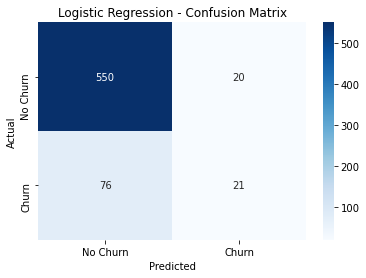

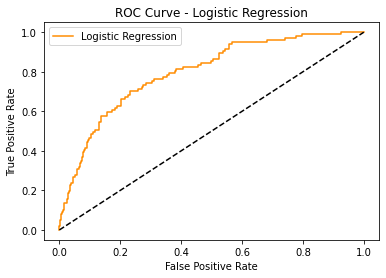

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predict on test set
y_pred = logreg_model.predict(X_test)
y_proba = logreg_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
